# Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Reading Files

In [2]:
Games = pd.read_csv("Games.csv")
Reviews = pd.read_csv("Reviews.csv")
Items = pd.read_parquet("Items.parquet")

# Functions

In [3]:
from textblob import TextBlob

# Sentiment Analysis
def sentiment_analysis(x):
    analysis = TextBlob(x)

    sentiment = analysis.sentiment.polarity

    if sentiment > 0.1:
        return 2
    elif sentiment < -0.1:
        return 0
    else:
        return 1


# Outliers
def identify_outliers_3sigma(data):
    """Identifies outliers using the 3 sigma method.

    Args:
        data (pd.Series or np.array): The numerical data to check for outliers.

    Returns:
        list: A list of indices of outlier values.
    """

    mean = np.mean(data)
    std = np.std(data)
    lower_bound = mean - 3 * std
    upper_bound = mean + 3 * std
    outliers = [i for i in range(len(data)) if data[i] < lower_bound or data[i] > upper_bound]
    return outliers

def identify_outliers_iqr(data):
    """Identifies outliers using the interquartile range (IQR) method.

    Args:
        data (pd.Series or np.array): The numerical data to check for outliers.

    Returns:
        list: A list of indices of outlier values.
    """

    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = [i for i in range(len(data)) if data[i] < lower_bound or data[i] > upper_bound]
    return outliers

def null_ratio(Dataset):
    null_ratio = ((Dataset.isnull().sum() / len(Dataset))*100).sort_values(ascending=False)
    return null_ratio

def points(x):
    if x == 0:
            return "Bad"
    if x == 1:
        return "Neutro"
    if x == 2: 
        return "Good"

# Games

In [9]:
Games.shape

(74834, 10)

In [10]:
Games.isnull().sum()

publisher       15641
genres           3283
app_name            3
title            2051
release_date     2899
tags              185
price            3346
early_access        0
developer        3479
release_year     2899
dtype: int64

In [11]:
null_ratio(Games)

publisher       20.900927
developer        4.648956
price            4.471230
genres           4.387043
release_date     3.873908
release_year     3.873908
title            2.740733
tags             0.247214
app_name         0.004009
early_access     0.000000
dtype: float64

In [12]:
Games_Year = Games['release_year'].value_counts()
Games_Year.sort_values(ascending=False)

Games_Year

release_year
2017.0    25277
2016.0    17909
2015.0    12407
2014.0     6445
2013.0     3090
2012.0     2160
2011.0     1034
2010.0      696
2009.0      507
2008.0      351
2018.0      316
2007.0      277
2006.0      230
2005.0      149
2003.0      128
2001.0      119
2004.0      107
1999.0       87
1998.0       86
2002.0       70
1997.0       67
1996.0       60
2000.0       60
1994.0       56
1995.0       51
1993.0       49
1992.0       26
1991.0       26
1990.0       16
1989.0       14
1988.0       11
1987.0       10
2019.0       10
1984.0        7
1983.0        6
1986.0        5
1985.0        3
1982.0        3
1981.0        3
2021.0        3
1970.0        2
1975.0        1
1980.0        1
Name: count, dtype: int64

In [18]:
Games['genres'].value_counts()

genres
Indie                        15858
Action                       11319
Casual                        8282
Adventure                     8242
Strategy                      6957
Simulation                    6699
RPG                           5479
Free to Play                  2031
Early Access                  1462
Sports                        1257
Massively Multiplayer         1108
Racing                        1083
Design &amp; Illustration      460
Utilities                      340
Web Publishing                 268
Animation &amp; Modeling       183
Education                      125
Video Production               116
Software Training              105
Audio Production                93
Photo Editing                   77
Accounting                       7
Name: count, dtype: int64

C:\Users\Jhon\AppData\Local\Temp\ipykernel_9700\1083242516.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=Games, y='genres', orient='h', palette=("cubehelix"))


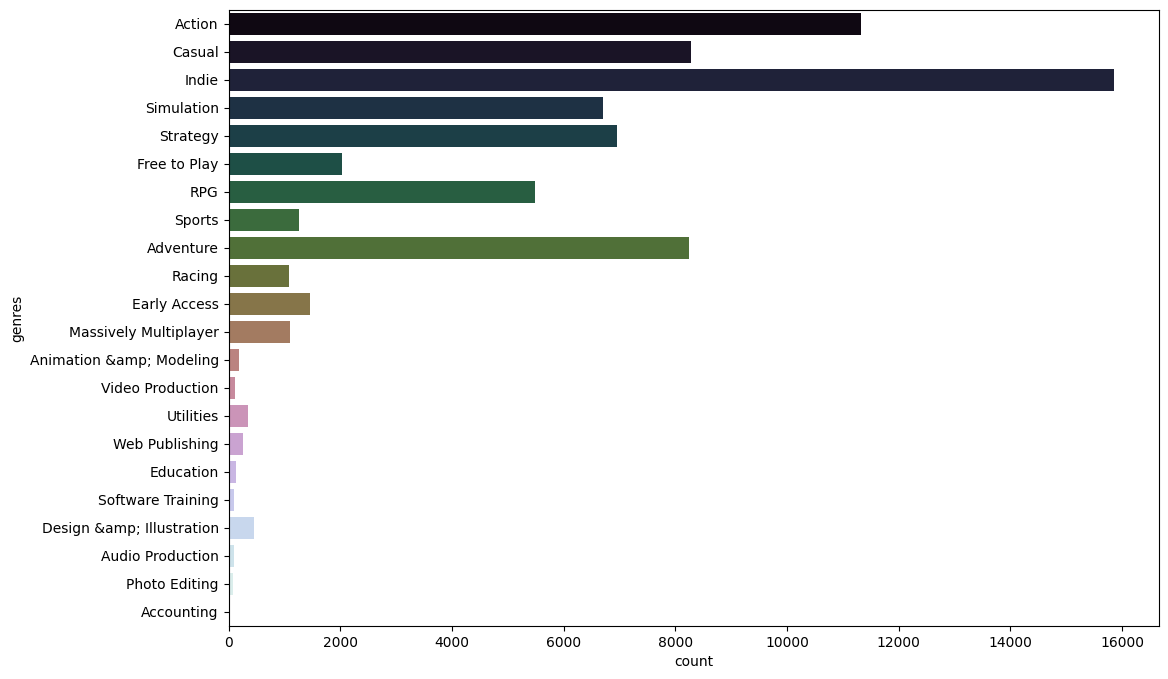

In [15]:
plt.figure(figsize=(12, 8))
sns.countplot(data=Games, y='genres', orient='h', palette=("cubehelix"))
plt.show()

In [53]:
unique_games = len(Games['title'].unique())
unique_games

28828

In [28]:
outliers_sigma_method = identify_outliers_3sigma(Games['price'])
outliers_sigma_method

TypeError: can only concatenate str (not "int") to str

In [27]:
outliers_iqr_method = identify_outliers_iqr(Games['price'])
outliers_iqr_method

TypeError: '<' not supported between instances of 'str' and 'float'

# Reviews

In [5]:
Reviews.isnull().sum()

user_id            0
user_url           0
funny          51133
item_id            0
helpful            0
recommend          0
review            30
posted_date    10115
posted_year    10115
dtype: int64

In [6]:
unique_users = len(Reviews['user_id'].unique())

25440

In [57]:
null_ratio(Reviews)

funny                 86.261113
posted_date           17.063954
posted_year           17.063954
review                 0.050610
user_id                0.000000
user_url               0.000000
item_id                0.000000
helpful                0.000000
recommend              0.000000
Sentiment_Analysis     0.000000
Label                  0.000000
dtype: float64

In [67]:
Recomendations = Reviews['recommend'].value_counts()
Recomendations

recommend
True     52448
False     6829
Name: count, dtype: int64

In [8]:
Reviews['Sentiment_Analysis'] = Reviews['review'].astype(str).apply(sentiment_analysis)


In [ ]:
Reviews['Label'] = Reviews['Sentiment_Analysis'].apply(points)

In [62]:
sentiment = Reviews[['Sentiment_Analysis', 'Label']].copy()
sentiment = pd.DataFrame(sentiment)

sentiment.value_counts()

Sentiment_Analysis  Label 
2                   Good      26256
1                   Neutro    24941
0                   Bad        8080
Name: count, dtype: int64

# Items

In [4]:
Items.shape

(5136659, 8)

In [5]:
Items.isnull().sum()

user_id             0
items_count         0
steam_id            0
user_url            0
item_id             0
item_name           0
playtime_forever    0
playtime_2weeks     0
dtype: int64

Text(0.5, 1.0, 'Most Purchased Games')

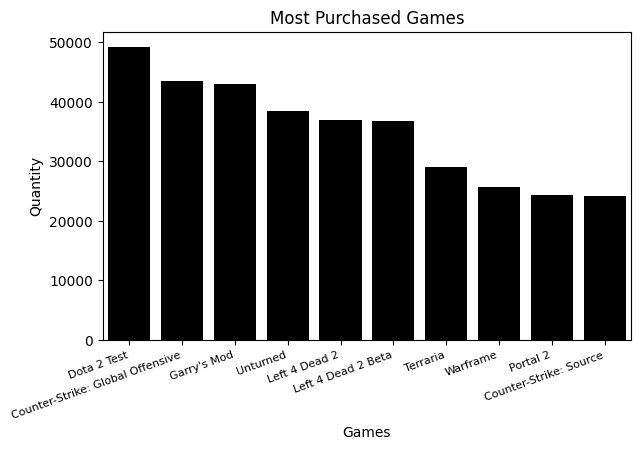

In [20]:
plt.figure(figsize=(15,4))

plt.subplot(1,2,1)
sns.barplot(Items["item_name"].value_counts()[:10],color="black")
plt.xticks(rotation = 20, ha = 'right' , fontsize = 8)
plt.xlabel("Games")
plt.ylabel("Quantity")
plt.title("Most Purchased Games")


In [11]:
time_spend = Items[['user_id', 'playtime_forever']].copy()
time_spend = pd.DataFrame(time_spend)
time_spend['Hours_Spend_Playing'] = time_spend['playtime_forever'] / 60
time_spend['Days_Spend_Playing'] = time_spend['Hours_Spend_Playing'] / 24
time_spend = time_spend.sort_values('Hours_Spend_Playing', ascending=False)


In [12]:
time_spend

,user_id,playtime_forever,Hours_Spend_Playing,Days_Spend_Playing
586999,Cydran,642773.0,10712.883333,446.370139
2495758,EucHellscythe,635295.0,10588.250000,441.177083
4069519,76561198018891278,632452.0,10540.866667,439.202778
1493518,poopinya,613411.0,10223.516667,425.979861
1834792,76561198048365774,600068.0,10001.133333,416.713889
...,...,...,...,...
3845016,irmikeee,0.0,0.000000,0.000000
3845015,irmikeee,0.0,0.000000,0.000000
3845014,irmikeee,0.0,0.000000,0.000000
1923472,thugnificent,0.0,0.000000,0.000000


In [23]:
plt.figure(figsize=(15,4))

plt.subplot(1,2,1)
sns.barplot(time_spend["user_id"].value_counts()[:10],color="black")
plt.xticks(rotation = 35, ha = 'right' , fontsize = 8)
plt.xlabel("user_id")
plt.ylabel("Hours_Spend_Playing")
plt.title("Hours Spend Playing")

KeyboardInterrupt: 